In [3]:
from glob import glob

import numpy as np
import pandas as pd
import thicket as th

import matplotlib.pyplot as plt

# pip install numpy pandas matplotlib llnl-thicket seaborn


In [4]:
tk = th.Thicket.from_caliperreader("cali")

(2/2) Creating Thicket: 100%|██████████| 249/249 [00:03<00:00, 69.21it/s] 
c:\Users\sebas_5\OneDrive\Documents\CSCE 435\Project\.venv\Lib\site-packages\thicket\ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [5]:
print(tk.tree(metric_column='Total time'))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.059 main
├─ 0.000 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.008 comm
│  ├─ 0.003 comm_large
│  │  ├─ 0.000 MPI_Recv
│  │  ├─ 0.000 MPI_Send
│  │  └─ 0.003 comp
│  │     └─ 0.003 comp_large
│  └─ 0.005 comm_small
│     ├─ 0.004 MPI_Bcast
│     └─ 0.001 MPI_Gather
├─ 0.026 comp
│  ├─ 0.026 comp_large
│  └─ 0.000 comp_small
├─ 0.005 correctness_check
│  ├─ 0.000 MPI_Bcast
│  ├─ 0.004 MPI_Gather
│  ├─ 0.000 MPI_Recv
│  ├─ 0.000 MPI_Reduce
│  └─ 0.000 MPI_Send
└─ 0.003 data_init_runtime

Legend (Metric: Total time Min: 0.00 Max: 1.06 indices: {'profile': np.int64(33379291)})
█ 0.95 - 1.06
█ 0.74 - 0.95
█ 0.53 - 0.74
█ 0.32 - 0.53
█ 0.11 - 0.32
█ 0.00 - 0.11

name User code    ◀  Only in left graph    ▶  Only in right graph



In [6]:
tk.metadata_column_to_perfdata("input_type")
input_types = sorted(tk.metadata["input_type"].unique())
tk.metadata_column_to_perfdata("input_size")
input_sizes = sorted(tk.metadata["input_size"].unique())
tk.metadata_column_to_perfdata("num_procs")
num_procs = sorted(tk.metadata["num_procs"].unique())

tk.metadata_column_to_perfdata("whole_computation")

tk.dataframe = tk.dataframe.reset_index().set_index(["input_type", "input_size", "num_procs", "whole_computation"]).sort_index()


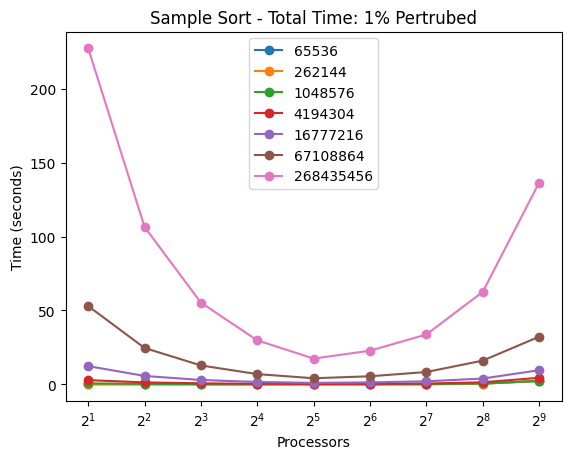

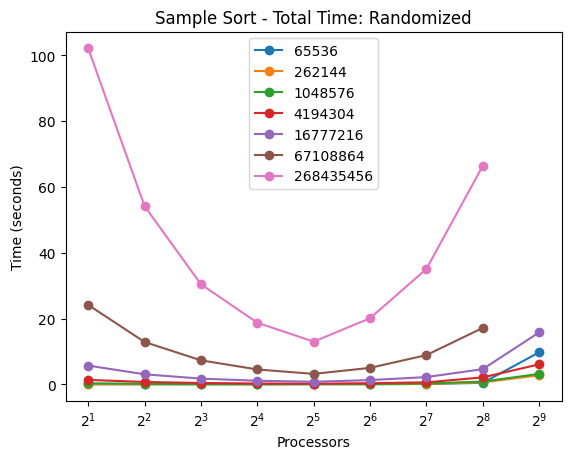

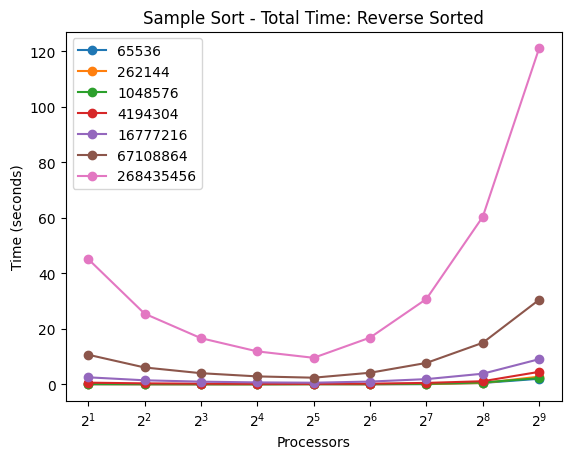

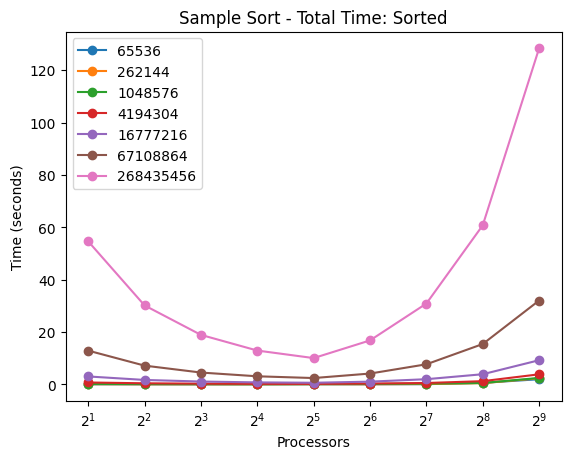

In [13]:
for input_type in input_types:
    data = tk.dataframe.xs((input_type), level=('input_type'))

    titles = {
        "Sorted" : "Sorted", 
        "1_perc_perturbed": "1% Pertrubed", 
        "Random" : "Randomized", 
        "ReverseSorted" : "Reverse Sorted"
    }

    x = num_procs
    y_whole_computation = {input_size: [] for input_size in input_sizes}

    for input_size in input_sizes:
        l1 = data["Total time"][input_size]
        for num_proc in num_procs:
            try:
                l2 = l1[num_proc]
                y_whole_computation[input_size].append(l2.index[0])
            except KeyError:
                y_whole_computation[input_size].append(None)

    plt.figure()
    for input_size in input_sizes:
         plt.plot(x, y_whole_computation[input_size], label=input_size, marker='o')
    plt.xticks(x)
    plt.xscale('log', base=2)
    plt.legend()
    plt.xlabel('Processors')
    plt.ylabel('Time (seconds)')
    plt.title("Sample Sort - Total Time: " + titles[input_type])
    file = './plots/Sample Sort - Total Time ' + titles[input_type] + '.png'
    file = file.replace(" ", "_")
    plt.savefig(file)
    plt.show()
    





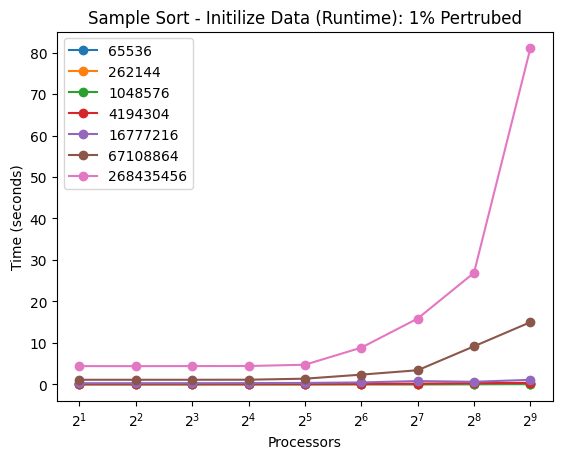

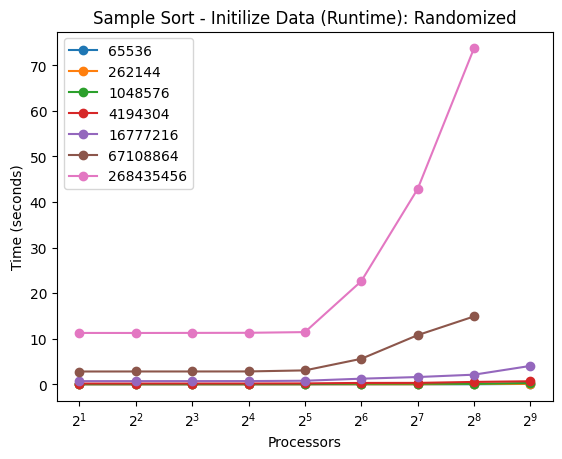

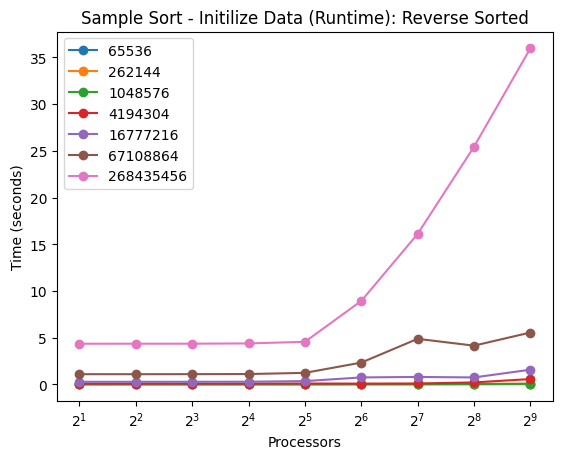

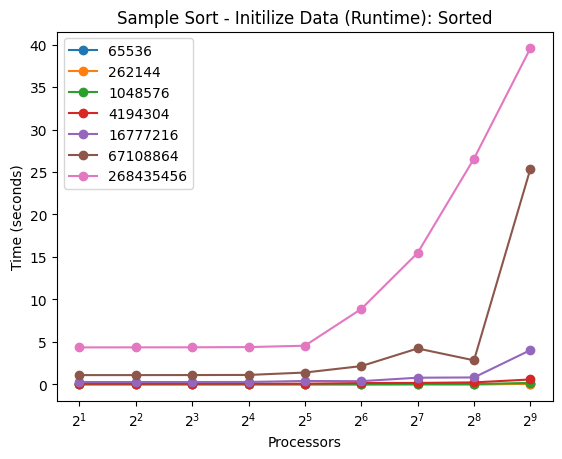

In [12]:
for input_type in input_types:
    data = tk.dataframe.loc[tk.dataframe['name'] == 'data_init_runtime']
    data = data.xs((input_type), level=('input_type'))

    titles = {
        "Sorted" : "Sorted", 
        "1_perc_perturbed": "1% Pertrubed", 
        "Random" : "Randomized", 
        "ReverseSorted" : "Reverse Sorted"
    }

    x = num_procs
    y_data_init_runtime = {input_size: [] for input_size in input_sizes}

    for input_size in input_sizes:
        for num_proc in num_procs:
            try:
                l1 = data.xs((input_size), level=('input_size'))
                l2 = l1.xs((num_proc), level=('num_procs'))
                value = l2["Total time"].tolist()
                y_data_init_runtime[input_size].append(value[0])
            except KeyError:
                y_data_init_runtime[input_size].append(None)
                
    plt.figure()
    for input_size in input_sizes:
         plt.plot(x, y_data_init_runtime[input_size], label=input_size, marker='o')
    plt.xticks(x)
    plt.xscale('log', base=2)
    plt.legend()
    plt.xlabel('Processors')
    plt.ylabel('Time (seconds)')
    plt.title("Sample Sort - Initilize Data (Runtime): " + titles[input_type])
    file = './plots/Sample Sort - Initilize Data (Runtime) ' + titles[input_type] + '.png'
    file = file.replace(" ", "_")
    plt.savefig(file)
    plt.show()
  



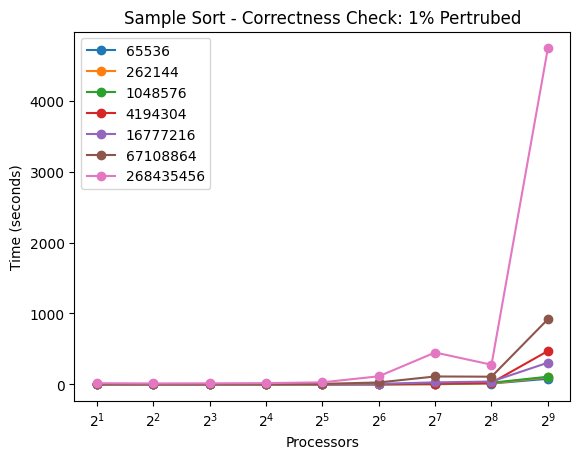

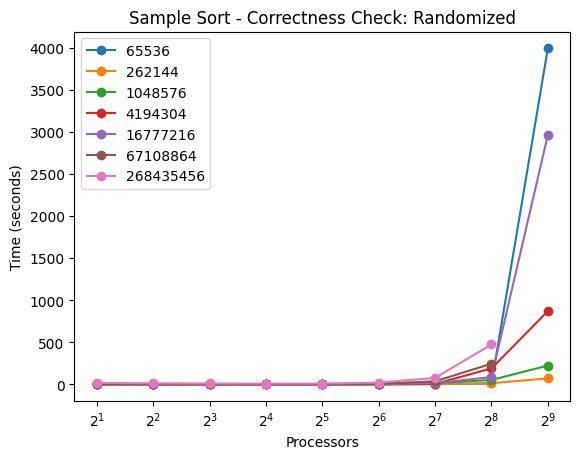

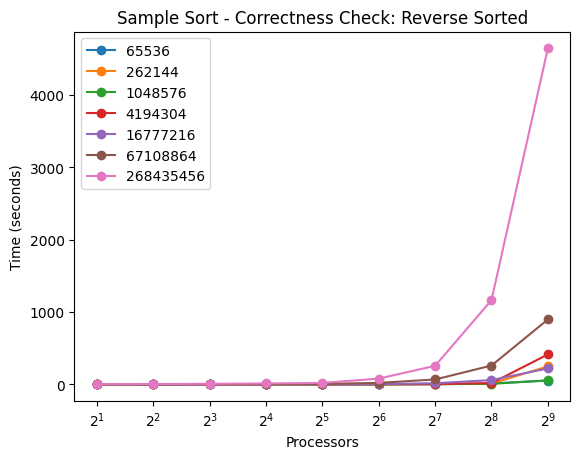

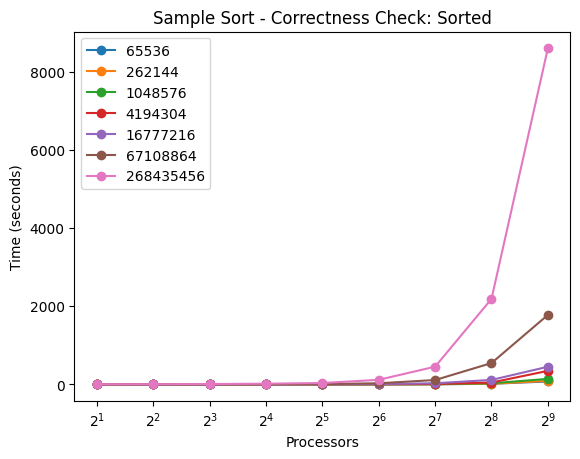

In [14]:
for input_type in input_types:
    data = tk.dataframe.loc[tk.dataframe['name'] == 'correctness_check']
    data = data.xs((input_type), level=('input_type'))

    titles = {
        "Sorted" : "Sorted", 
        "1_perc_perturbed": "1% Pertrubed", 
        "Random" : "Randomized", 
        "ReverseSorted" : "Reverse Sorted"
    }

    x = num_procs
    y_data_init_runtime = {input_size: [] for input_size in input_sizes}

    for input_size in input_sizes:
        for num_proc in num_procs:
            try:
                l1 = data.xs((input_size), level=('input_size'))
                l2 = l1.xs((num_proc), level=('num_procs'))
                value = l2["Total time"].tolist()
                y_data_init_runtime[input_size].append(value[0])
            except KeyError:
                y_data_init_runtime[input_size].append(None)
                
    plt.figure()
    for input_size in input_sizes:
         plt.plot(x, y_data_init_runtime[input_size], label=input_size, marker='o')
    plt.xticks(x)
    plt.xscale('log', base=2)
    plt.legend()
    plt.xlabel('Processors')
    plt.ylabel('Time (seconds)')
    plt.title("Sample Sort - Correctness Check: " + titles[input_type])
    file = './plots/Sample Sort - Correctness Check ' + titles[input_type] + '.png'
    file = file.replace(" ", "_")
    plt.savefig(file)
    plt.show()
  



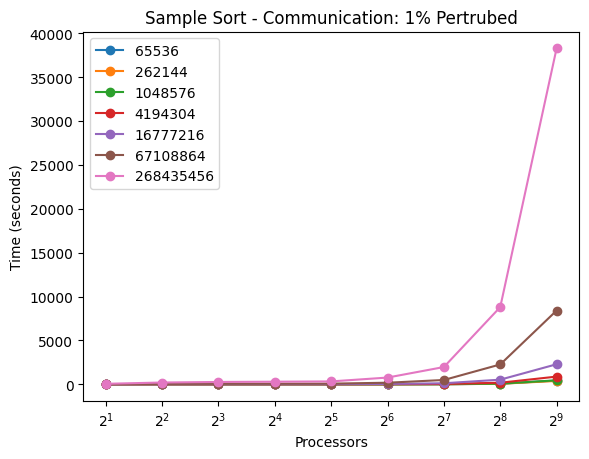

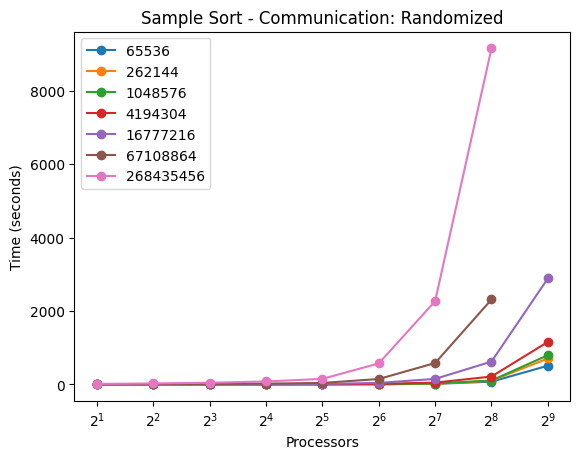

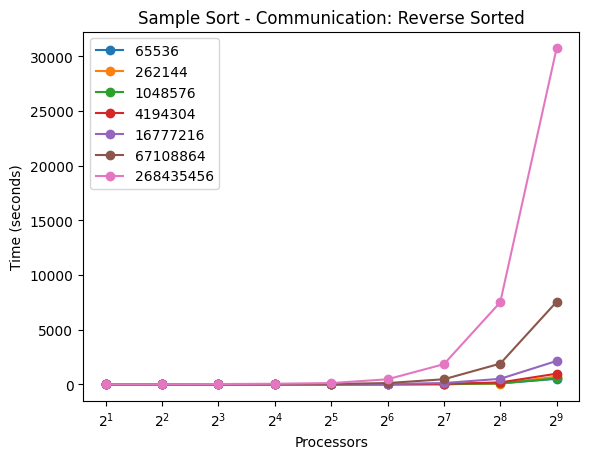

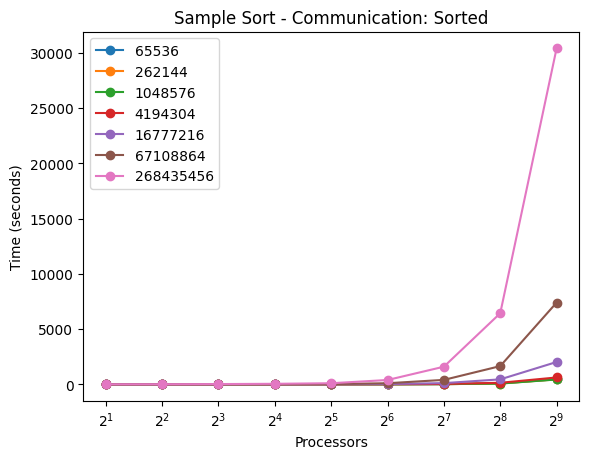

In [15]:
for input_type in input_types:
    data = tk.dataframe.loc[tk.dataframe['name'] == 'comm']
    data = data.xs((input_type), level=('input_type'))

    titles = {
        "Sorted" : "Sorted", 
        "1_perc_perturbed": "1% Pertrubed", 
        "Random" : "Randomized", 
        "ReverseSorted" : "Reverse Sorted"
    }

    x = num_procs
    y_data_init_runtime = {input_size: [] for input_size in input_sizes}

    for input_size in input_sizes:
        for num_proc in num_procs:
            try:
                l1 = data.xs((input_size), level=('input_size'))
                l2 = l1.xs((num_proc), level=('num_procs'))
                value = l2["Total time"].tolist()
                y_data_init_runtime[input_size].append(value[0])
            except KeyError:
                y_data_init_runtime[input_size].append(None)
                
    plt.figure()
    for input_size in input_sizes:
         plt.plot(x, y_data_init_runtime[input_size], label=input_size, marker='o')
    plt.xticks(x)
    plt.xscale('log', base=2)
    plt.legend()
    plt.xlabel('Processors')
    plt.ylabel('Time (seconds)')
    plt.title("Sample Sort - Communication: " + titles[input_type])
    file = './plots/Sample Sort - Communication ' + titles[input_type] + '.png'
    file = file.replace(" ", "_")
    plt.savefig(file)
    plt.show()
  



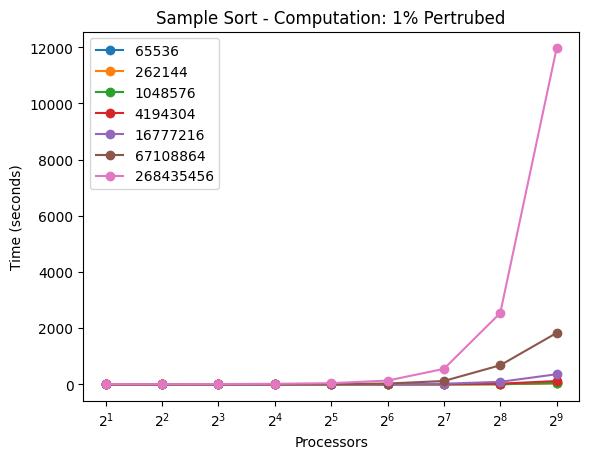

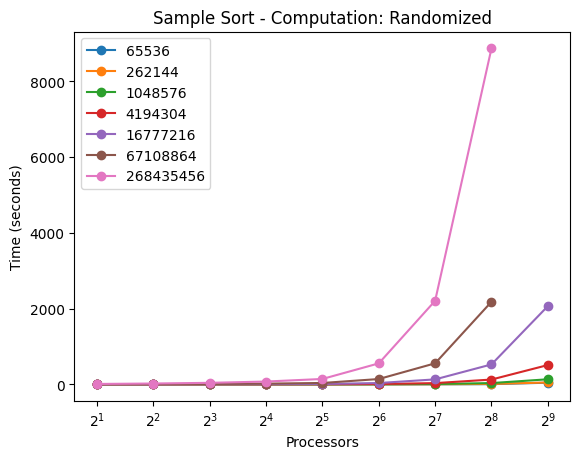

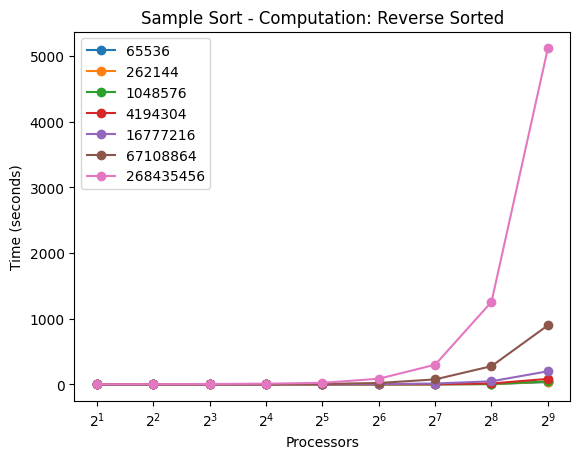

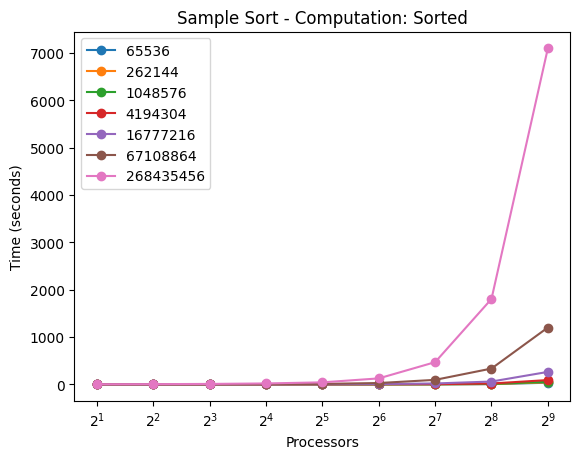

In [11]:
for input_type in input_types:
    data = tk.dataframe.loc[tk.dataframe['name'] == 'comp']
    data = data.xs((input_type), level=('input_type'))

    titles = {
        "Sorted" : "Sorted", 
        "1_perc_perturbed": "1% Pertrubed", 
        "Random" : "Randomized", 
        "ReverseSorted" : "Reverse Sorted"
    }

    x = num_procs
    y_data_init_runtime = {input_size: [] for input_size in input_sizes}

    for input_size in input_sizes:
        for num_proc in num_procs:
            try:
                l1 = data.xs((input_size), level=('input_size'))
                l2 = l1.xs((num_proc), level=('num_procs'))
                value = l2["Total time"].tolist()
                y_data_init_runtime[input_size].append(value[0])
            except KeyError:
                y_data_init_runtime[input_size].append(None)
                
    plt.figure()
    for input_size in input_sizes:
         plt.plot(x, y_data_init_runtime[input_size], label=input_size, marker='o')
    plt.xticks(x)
    plt.xscale('log', base=2)
    plt.legend()
    plt.xlabel('Processors')
    plt.ylabel('Time (seconds)')
    plt.title("Sample Sort - Computation: " + titles[input_type])
    file = './plots/Sample Sort - Computation ' + titles[input_type] + '.png'
    file = file.replace(" ", "_")
    plt.savefig(file)
    plt.show()
  

